Reinforcement Learning


Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

Implement UCB

In [5]:
import math

N = 10000
d = 10

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0

for n in range(0 , N):
    ad = 0
    max_upper_bound = 0
    for i in range(0 , d):
        if(numbers_of_selections[i] > 0):
            average_rewards = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_rewards + delta_i
        else:
            upper_bound = 1e400
        
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_rewards += reward

Visualizing the results

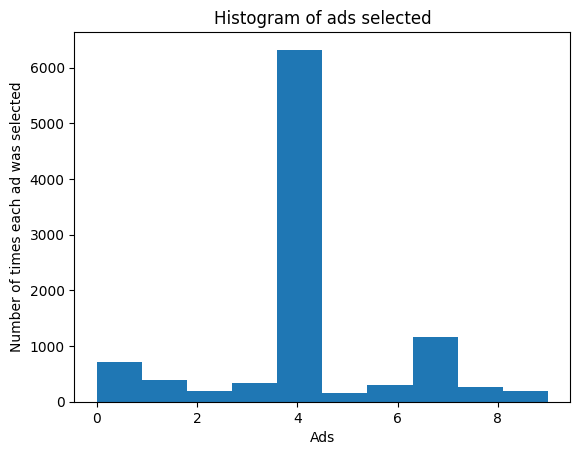

In [6]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()